In [1]:
import os
base_dir = '/content/drive/MyDrive/BOOTCAMP_DSG1/DEEP-LEARNING/datasets'

In [4]:
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
test_dir = os.path.join(base_dir,'test')

# RUTA LA ENTRENAMIENTO DE PERROS Y GATOS

In [6]:
train_gatos_dir = os.path.join(train_dir,'gatos')
train_perros_dir = os.path.join(train_dir,'perros')

validation_gatos_dir = os.path.join(validation_dir,'gatos')
validation_perros_dir = os.path.join(validation_dir,'perros')

test_gatos_dir = os.path.join(test_dir,'gatos')
test_perros_dir = os.path.join(test_dir,'perros')


# MOSTRAMOS UNA IMAGEN DE NUESTRO DATASET

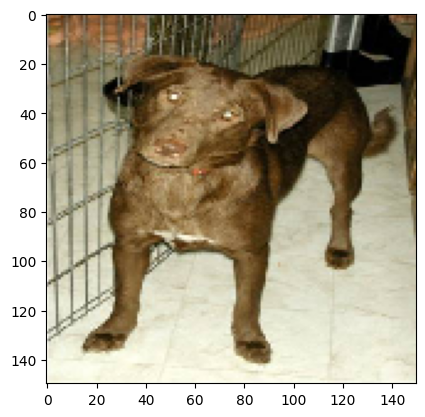

In [13]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

fnames = [os.path.join(train_perros_dir,fname) for fname in os.listdir(train_perros_dir)]

img_path = fnames[0]
img = image.load_img(img_path, target_size=(150,150))
x = image.img_to_array(img)

plt.figure()
imgplot = plt.imshow(image.array_to_img(x))
plt.show()